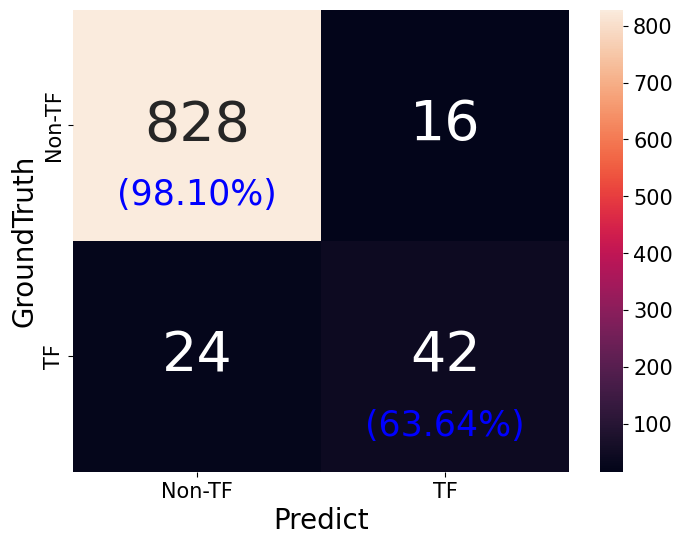

In [4]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
# 加载保存的数据
data = np.load('./label_gat.npz')
pred = data['predict']
y_test = data['groundtruth']
target_names=['Non-TF','TF']
# 计算classification_report
report = classification_report(y_test, pred, target_names=target_names, output_dict = True)


import numpy as np

# 计算混淆矩阵
cm = confusion_matrix(y_test, pred)

# 计算每个类别的正确比例
correct_ratios = np.diag(cm) / cm.sum(axis=1)
pd.DataFrame(report).to_csv("1.csv")
# 绘制混淆矩阵热图
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=target_names, yticklabels=target_names, annot_kws={"fontsize":40})
ax.set_xlabel('Predict', size=20)
ax.set_ylabel('GroundTruth', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gcf().set_size_inches(8, 6)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)

# 在热图上标出每个类别的正确比例
for i, label in enumerate(target_names):
    ax.annotate(f"({correct_ratios[i]:.2%})", xy=(i+0.5, i+0.8), ha="center", va="center", fontsize=25, color="blue")

plt.show()

In [5]:
pd.DataFrame(report).to_csv("1.csv")

In [6]:
pd.DataFrame(report)

,Non-TF,TF,accuracy,macro avg,weighted avg
precision,0.971831,0.724138,0.956044,0.847984,0.953866
recall,0.981043,0.636364,0.956044,0.808703,0.956044
f1-score,0.976415,0.677419,0.956044,0.826917,0.954730
support,844.000000,66.000000,0.956044,910.000000,910.000000
